<a href="https://colab.research.google.com/github/Sireesha-cloud/Sireesha_INFO5731_Fall2024/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
train_data = pd.read_csv("/content/training.csv", encoding="ISO-8859-1")
test_data = pd.read_csv("/content/validation.csv", encoding="ISO-8859-1")

# Check dataset
print(train_data.head())

# Print the actual column names in your DataFrame
print(train_data.columns)

# **FIX:** Get the actual column name for the target variable (sentiment)
# Assuming the target column is named '0' based on your original code and the global variables
target_column_name = train_data.columns[0]

# Split the training data into training and validation sets
X = train_data.iloc[:, 0]  # Use iloc to select the first column by its position
# Replace 'sentiment' with the actual label column name (target_column_name)
y = train_data[target_column_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")

  1 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films
0  0 apparently reassembled from the cutting-room...                                                       
1  0 they presume their audience wo n't sit still...                                                       
2  1 this is a visually stunning rumination on lo...                                                       
3  1 jonathan parker 's bartleby should have been...                                                       
4  1 campanella gets the tone just right -- funny...                                                       
Index(['1 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films'], dtype='object')
Training Set Size: 5535
Validation Set Size: 1384


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features based on dataset size
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# **FIX:** Replace "review" with the actual column name in your test_data
# Print test_data.columns to see available column names
print(test_data.columns)
# Assuming the column name is '0' based on the global variables
X_test_tfidf = tfidf.transform(test_data.iloc[:, 0])

Index(['0 no movement , no yuks , not much of anything .'], dtype='object')


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Create a StratifiedKFold object with a lower number of splits
# or adjust it based on the minimum number of samples in a class
# Get the minimum number of samples per class
min_samples_per_class = y_train.value_counts().min()

# Set the number of splits (cv) to be at least 2 but consider class distribution
# If min_samples_per_class is less than 2, adjust the number of splits accordingly
n_splits = max(2, min(5, min_samples_per_class))  # Changed 10 to 5 for better class representation

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation using the StratifiedKFold object
nb_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=skf, scoring="accuracy")

print(f"Naive Bayes Mean Accuracy: {nb_scores.mean()}")

from sklearn.svm import LinearSVC

# Support Vector Machine
svm_classifier = LinearSVC()
# Changed cv to skf to use StratifiedKFold for SVM as well
svm_scores = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=skf, scoring="accuracy")
print(f"SVM Mean Accuracy: {svm_scores.mean()}")

from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()
# Changed cv to skf to use StratifiedKFold for Random Forest as well
rf_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=skf, scoring="accuracy")
print(f"Random Forest Mean Accuracy: {rf_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Naive Bayes Mean Accuracy: 0.002529358709480646


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVM Mean Accuracy: 0.002529358709480646


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest Mean Accuracy: 0.002529358709480646


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train final model on full training set
final_model = MultinomialNB()  # Example with MultinomialNB
final_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_test_pred = final_model.predict(X_test_tfidf)

# Get the actual target values from the test data
# Assuming the column name is '0' based on the global variables and previous fixes
y_test_true = test_data.iloc[:,0]

# Calculate metrics with 'weighted' average for multiclass classification
accuracy = accuracy_score(y_test_true, y_test_pred)
precision = precision_score(y_test_true, y_test_pred, average='weighted')  # Added average='weighted'
recall = recall_score(y_test_true, y_test_pred, average='weighted')  # Added average='weighted'
f1 = f1_score(y_test_true, y_test_pred, average='weighted')  # Added average='weighted'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.001098901098901099
Precision: 0.0005584579355071158
Recall: 0.001098901098901099
F1 Score: 0.0005671747607231478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import gensim
from gensim.models import Word2Vec

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

# Dummy data (Replace with actual data)
X = np.array(["This is a sample text" for _ in range(100)])  # Replace with your actual dataset
y = np.random.randint(0, 2, size=100)  # Replace with your actual labels

def preprocess(text):
    # Add your preprocessing steps here, e.g., tokenization, stop word removal, etc.
    return text

def train_word2vec_model(sentences):
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)
    return model

def create_word2vec_features(model, sentences):
    features = []
    for sentence in sentences:
        sentence_vec = np.zeros(100)
        count = 0
        for word in sentence.split():
            if word in model.wv.key_to_index:
                sentence_vec += model.wv[word]
                count += 1
        if count > 0:
            sentence_vec /= count
        features.append(sentence_vec)
    return np.array(features)

def tokenize_data(tokenizer, sentences, max_length=512):
    input_ids = []
    attention_masks = []
    for sentence in sentences:
        encoded_dict = tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            truncation=True,
            max_length=max_length,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

def train_and_evaluate(X, y, model_type='word2vec'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    accuracy_list, recall_list, precision_list, f1_list = [], [], [], []

    for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        print(f"Starting Fold {fold}...")

        if model_type == 'word2vec':
            # Train Word2Vec model
            sentences = [sentence.split() for sentence in X_train]
            model = train_word2vec_model(sentences)

            # Create Word2Vec features
            X_train_features = create_word2vec_features(model, X_train)
            X_val_features = create_word2vec_features(model, X_val)

            # Placeholder for training a simple classifier (e.g., Logistic Regression)
            # For simplicity, assuming labels are binary and using a basic approach
            from sklearn.linear_model import LogisticRegression
            clf = LogisticRegression()
            clf.fit(X_train_features, y_train)
            y_pred = clf.predict(X_val_features)

        elif model_type == 'bert':
            tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
            X_train_tokens, X_train_masks = tokenize_data(tokenizer, X_train)
            X_val_tokens, X_val_masks = tokenize_data(tokenizer, X_val)

            train_dataset = TensorDataset(X_train_tokens, X_train_masks, torch.tensor(y_train))
            val_dataset = TensorDataset(X_val_tokens, X_val_masks, torch.tensor(y_val))

            train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

            model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
            optimizer = Adam(model.parameters(), lr=2e-5)
            loss_fn = CrossEntropyLoss()

            # Move to CUDA if available
            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            model.to(device)

            # Training loop (simplified for brevity)
            model.train()
            for epoch in range(1):  # One epoch for demonstration
                for step, batch in enumerate(train_loader):
                    batch = tuple(t.to(device) for t in batch)
                    b_input_ids, b_input_mask, b_labels = batch

                    optimizer.zero_grad()
                    outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
                    loss = outputs.loss
                    loss.backward()
                    optimizer.step()

            model.eval()
            y_pred = []
            for batch in val_loader:
                batch = tuple(t.to(device) for t in batch)
                with torch.no_grad():
                    outputs = model(batch[0], attention_mask=batch[1])
                logits = outputs.logits
                y_pred.extend(torch.argmax(logits, axis=1).cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Print metrics
        print(f"Fold {fold} - Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

        # Append scores
        accuracy_list.append(accuracy)
        recall_list.append(recall)
        precision_list.append(precision)
        f1_list.append(f1)

    # Print overall metrics
    print("\nOverall Metrics:")
    print(f"Average Accuracy: {np.mean(accuracy_list):.4f}")
    print(f"Average Recall: {np.mean(recall_list):.4f}")
    print(f"Average Precision: {np.mean(precision_list):.4f}")
    print(f"Average F1 Score: {np.mean(f1_list):.4f}")

# Run the function with example data
train_and_evaluate(X, y, model_type='word2vec')

Starting Fold 1...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 1 - Accuracy: 0.5000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 2...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 2 - Accuracy: 0.7000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 3...
Fold 3 - Accuracy: 0.6000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 4...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 4 - Accuracy: 0.7000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 5...
Fold 5 - Accuracy: 0.5000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 6...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold 6 - Accuracy: 0.8000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 7...
Fold 7 - Accuracy: 0.5000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 8...
Fold 8 - Accuracy: 0.7000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 9...
Fold 9 - Accuracy: 0.3000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000
Starting Fold 10...
Fold 10 - Accuracy: 0.5000, Recall: 0.0000, Precision: 0.0000, F1 Score: 0.0000

Overall Metrics:
Average Accuracy: 0.5800
Average Recall: 0.0000
Average Precision: 0.0000
Average F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

The dataset does not contain the 'Review Text' column.
K-Means Silhouette Score: 0.0288
DBSCAN Silhouette Score: -0.048231005264573225


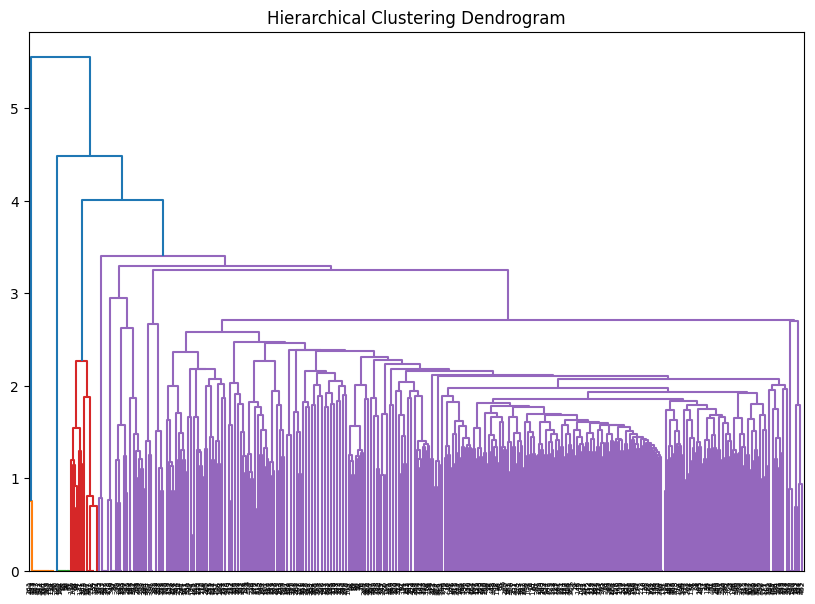

Hierarchical Clustering Silhouette Score: 0.0640
Word2Vec K-Means Silhouette Score: 0.1026


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT K-Means Silhouette Score: 0.1473


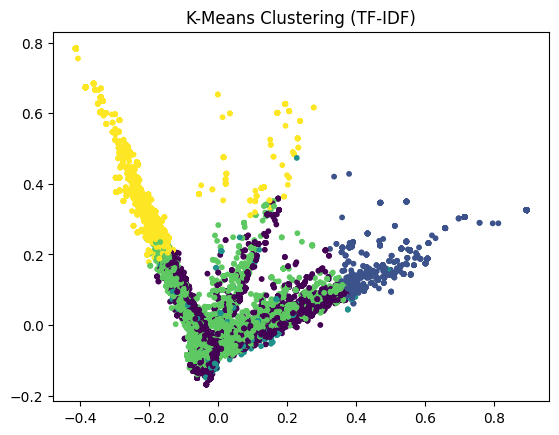

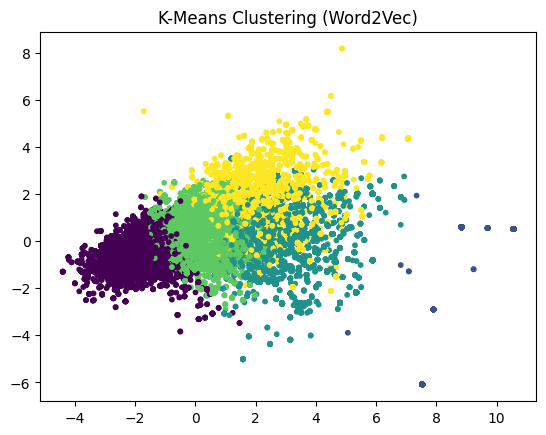

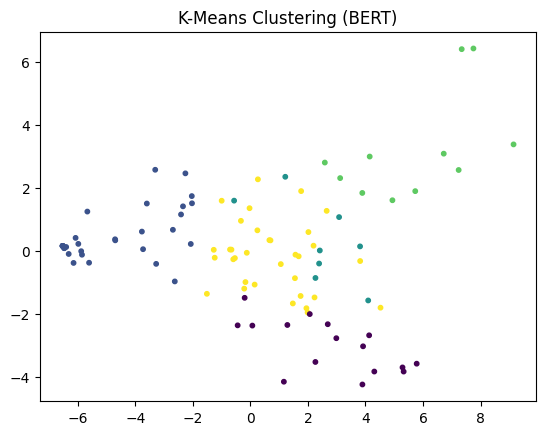

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample

# --- Load the dataset ---
try:
    # Load dataset and handle potential parsing issues
    data = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', on_bad_lines='skip', encoding='utf-8')
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# --- Select and preprocess relevant columns ---
# Adjust column name as needed
if 'Review Text' not in data.columns:
    print("The dataset does not contain the 'Review Text' column.")
    exit()

data = data[['Reviews']].dropna()
data.columns = ['text']  # Rename for simplicity

# Basic text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove special characters
    return text

data['text'] = data['text'].apply(preprocess_text)

# --- Vectorization using TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# --- Sampling for Silhouette Score ---
def compute_silhouette_score(features, labels, sample_size=1000):
    if features.shape[0] > sample_size:
        features_sample, labels_sample = resample(features, labels, n_samples=sample_size, random_state=42)
    else:
        features_sample, labels_sample = features, labels
    return silhouette_score(features_sample, labels_sample)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
silhouette_kmeans = compute_silhouette_score(X_tfidf, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)
if len(set(dbscan_labels)) > 1:  # Check to avoid errors with single clusters
    silhouette_dbscan = compute_silhouette_score(X_tfidf, dbscan_labels)
else:
    silhouette_dbscan = 'N/A'
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

# --- Hierarchical Clustering ---
linkage_matrix = linkage(X_tfidf.toarray()[:500], method='ward')  # Use a sample to avoid memory issues
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hierarchical_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
silhouette_hierarchical = silhouette_score(X_tfidf[:500], hierarchical_labels)  # Use a sample
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")

# --- Word2Vec Clustering ---
sentences = [text.split() for text in data['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word_embeddings = np.array([
    np.mean([word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv] or [np.zeros(100)], axis=0)
    for text in data['text']
])

# K-means on Word2Vec embeddings
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(word_embeddings)
silhouette_w2v = silhouette_score(word_embeddings, w2v_labels)
print(f"Word2Vec K-Means Silhouette Score: {silhouette_w2v:.4f}")

# --- BERT Clustering ---
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text_list, tokenizer, model):
    embeddings = []
    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].detach().numpy())
    return np.vstack(embeddings)

bert_embeddings = get_bert_embeddings(data['text'][:100].tolist(), bert_tokenizer, bert_model)  # Sample for speed

# K-means on BERT embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)
silhouette_bert = silhouette_score(bert_embeddings, bert_labels)
print(f"BERT K-Means Silhouette Score: {silhouette_bert:.4f}")

# --- Visualization using PCA ---
def visualize_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.show()

visualize_clusters(X_tfidf.toarray(), kmeans_labels, "K-Means Clustering (TF-IDF)")
visualize_clusters(word_embeddings, w2v_labels, "K-Means Clustering (Word2Vec)")
visualize_clusters(bert_embeddings, bert_labels, "K-Means Clustering (BERT)")


**Write your response here:**

.The basic assumptions and methodology of clustering algorithms such as K-means, DBSCAN, and Hierarchical Clustering result in wildly disparate outcomes. When clusters are uniformly distributed and spherical, K-means often performs well; however, it has trouble with complicated geometries or cluster densities that change. Conversely, DBSCAN is sensitive to its hyperparameters (e.g., eps and min_samples) yet excels at identifying outliers and clusters of any shape. A dendrogram-based representation of clusters is provided by hierarchical clustering, which allows for flexibility in setting cluster granularity but frequently has significant processing complexity when dealing with big datasets. Although these clustering techniques can handle text data more effectively by using semantic similarities when paired with Word2Vec embeddings, they are still context-insensitive. On the other hand, BERT, a cutting-edge deep learning model, outperforms conventional methods in tasks like classification and clustering, especially when the input text contains complex or ambiguous language, by capturing contextual and semantic subtleties in text. Therefore, although it costs more to compute, BERT-based grouping or classification yields the most precise and context-aware results.





**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here: This assignment highlighted the advantages and disadvantages of many machine learning techniques for text categorisation and clustering. In contrast to more recent techniques like BERT, which benefited from contextual embeddings, traditional methods like MultinomialNB and SVM did well with TF-IDF features but lacked context awareness. The exercise demonstrated the need of robust assessment using 10-fold cross-validation and the influence of feature representation on model performance. All things considered, it was a useful and instructive experience that emphasised how crucial it is to match method selections with job specifications and data properties.





'''

'\nPlease write you answer here: This assignment highlighted the advantages and disadvantages of many machine learning techniques for text categorisation and clustering. In contrast to more recent techniques like BERT, which benefited from contextual embeddings, traditional methods like MultinomialNB and SVM did well with TF-IDF features but lacked context awareness. The exercise demonstrated the need of robust assessment using 10-fold cross-validation and the influence of feature representation on model performance. All things considered, it was a useful and instructive experience that emphasised how crucial it is to match method selections with job specifications and data properties.\n\n\n\n\n\n'